In [ ]:
import pandas as pd

df = pd.read_csv('TVSMOTOR.NS.csv');

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-02,12.497500,12.497500,12.497500,12.497500,9.261576,100.0
1,2000-08-03,11.850000,12.000000,10.800000,11.547500,8.557557,33020.0
2,2000-08-04,11.650000,11.650000,10.900000,11.200000,8.300032,25500.0
3,2000-08-07,11.050000,11.050000,10.800000,10.807500,8.009162,13320.0
4,2000-08-08,10.350000,11.000000,10.350000,10.742500,7.960991,47520.0
...,...,...,...,...,...,...,...
5908,2024-04-01,2174.000000,2195.000000,2128.199951,2139.100098,2139.100098,591922.0
5909,2024-04-02,2175.300049,2175.300049,2116.899902,2150.550049,2150.550049,899959.0
5910,2024-04-03,2150.000000,2150.000000,2101.199951,2104.399902,2104.399902,718065.0
5911,2024-04-04,2118.850098,2118.850098,2067.750000,2086.699951,2086.699951,797799.0


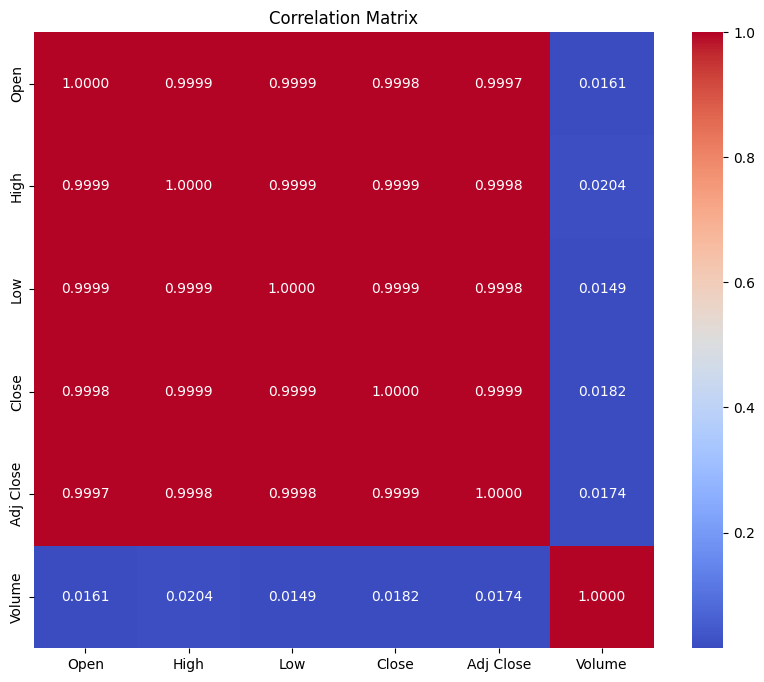

In [ ]:
numeric_df = df.drop(columns=['Date'])  # Exclude non-numeric columns
correlation_matrix = numeric_df.corr()

# Step 2: Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df = df[['Date','Open','Volume']]

In [ ]:
df

,Date,Open,Volume
0,2000-08-02,12.497500,100.0
1,2000-08-03,11.850000,33020.0
2,2000-08-04,11.650000,25500.0
3,2000-08-07,11.050000,13320.0
4,2000-08-08,10.350000,47520.0
...,...,...,...
5908,2024-04-01,2174.000000,591922.0
5909,2024-04-02,2175.300049,899959.0
5910,2024-04-03,2150.000000,718065.0
5911,2024-04-04,2118.850098,797799.0


In [ ]:
df['Date']

0       2000-08-02
1       2000-08-03
2       2000-08-04
3       2000-08-07
4       2000-08-08
           ...    
5908    2024-04-01
5909    2024-04-02
5910    2024-04-03
5911    2024-04-04
5912    2024-04-05
Name: Date, Length: 5913, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2003-09-04')
datetime_object

datetime.datetime(2003, 9, 4, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-40-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2000-08-02
1      2000-08-03
2      2000-08-04
3      2000-08-07
4      2000-08-08
          ...    
5908   2024-04-01
5909   2024-04-02
5910   2024-04-03
5911   2024-04-04
5912   2024-04-05
Name: Date, Length: 5913, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Open,Volume
Date,,
2000-08-02,12.497500,100.0
2000-08-03,11.850000,33020.0
2000-08-04,11.650000,25500.0
2000-08-07,11.050000,13320.0
2000-08-08,10.350000,47520.0
...,...,...
2024-04-01,2174.000000,591922.0
2024-04-02,2175.300049,899959.0
2024-04-03,2150.000000,718065.0


In [ ]:
a = 0
b = 1

# Normalize Close and Volume columns
for col in ['Open', 'Volume']:
    X_min = df[col].min()
    X_max = df[col].max()
    df[col+'_normalized'] = (b - a) * ((df[col] - X_min) / (X_max - X_min)) + a

df

<ipython-input-42-3421521d7a56>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col+'_normalized'] = (b - a) * ((df[col] - X_min) / (X_max - X_min)) + a
<ipython-input-42-3421521d7a56>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col+'_normalized'] = (b - a) * ((df[col] - X_min) / (X_max - X_min)) + a


,Open,Volume,Open_normalized,Volume_normalized
Date,,,,
2000-08-02,12.497500,100.0,0.004030,0.000002
2000-08-03,11.850000,33020.0,0.003748,0.000655
2000-08-04,11.650000,25500.0,0.003661,0.000506
2000-08-07,11.050000,13320.0,0.003399,0.000264
2000-08-08,10.350000,47520.0,0.003093,0.000943
...,...,...,...,...
2024-04-01,2174.000000,591922.0,0.947119,0.011742
2024-04-02,2175.300049,899959.0,0.947686,0.017852
2024-04-03,2150.000000,718065.0,0.936648,0.014244


In [ ]:
df['Volume_normalized'].max()

1.0

In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().values.any())

False


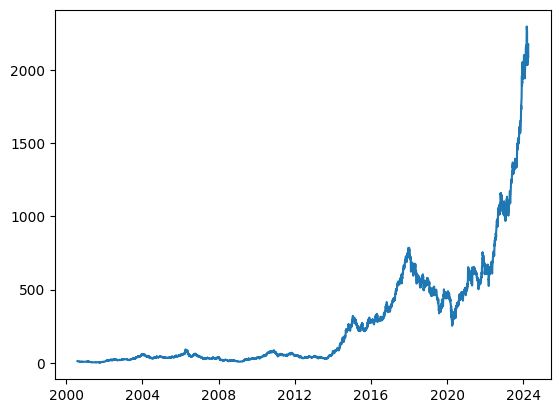

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Open'])

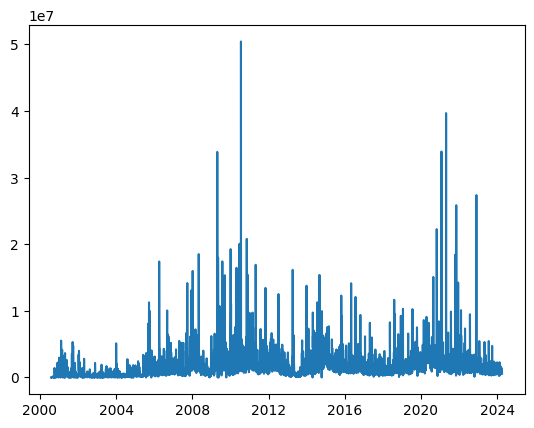

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Volume'])

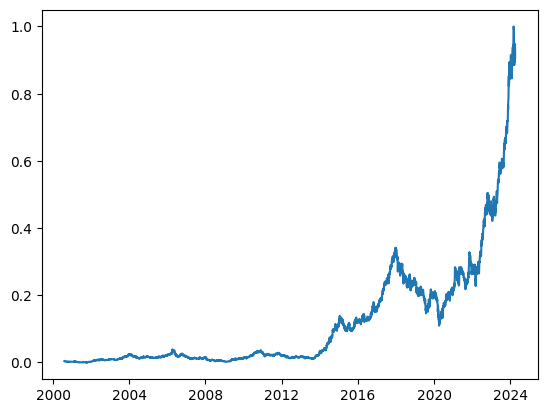

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Open_normalized'])

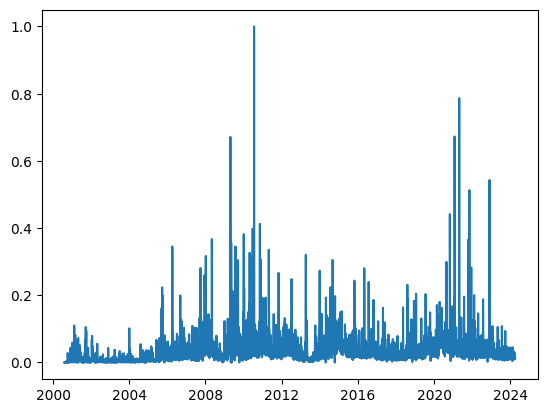

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Volume_normalized'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_volume, Y_open, Y_volume = [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open_normalized'].to_numpy()
        volume_values = df_subset['Volume_normalized'].to_numpy()

        x_open, y_open = open_values[:-1], open_values[-1]
        x_volume, y_volume = volume_values[:-1], volume_values[-1]

        dates.append(target_date)
        X_open.append(x_open)
        X_volume.append(x_volume)
        Y_open.append(y_open)
        Y_volume.append(y_volume)

        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_volume = np.array(X_volume)
    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'Volume-{n-i}'] = X_volume[:, i]

    ret_df['Target Open'] = Y_open
    ret_df['Target Volume'] = Y_volume

    return ret_df


windowed_df = df_to_windowed_df(df,
                                '2020-08-07',
                                '2024-04-05',
                                n=3)
windowed_df


,Target Date,Open-3,Volume-3,Open-2,Volume-2,Open-1,Volume-1,Target Open,Target Volume
0,2020-08-07,0.171946,0.058053,0.175197,0.043954,0.179647,0.072745,0.181392,0.116925
1,2020-08-10,0.175197,0.043954,0.179647,0.072745,0.181392,0.116925,0.184010,0.041320
2,2020-08-11,0.179647,0.072745,0.181392,0.116925,0.184010,0.041320,0.181479,0.043769
3,2020-08-12,0.181392,0.116925,0.184010,0.041320,0.181479,0.043769,0.180389,0.077218
4,2020-08-13,0.184010,0.041320,0.181479,0.043769,0.180389,0.077218,0.182396,0.115855
...,...,...,...,...,...,...,...,...,...
903,2024-04-01,0.894456,0.021148,0.914832,0.026101,0.932284,0.018542,0.947119,0.011742
904,2024-04-02,0.914832,0.026101,0.932284,0.018542,0.947119,0.011742,0.947686,0.017852
905,2024-04-03,0.932284,0.018542,0.947119,0.011742,0.947686,0.017852,0.936648,0.014244
906,2024-04-04,0.947119,0.011742,0.947686,0.017852,0.936648,0.014244,0.923057,0.015826


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-2]
  X = middle_matrix.reshape((len(dates), int(middle_matrix.shape[1]/2), 2))

  Y = df_as_np[:, -2]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((908,), (908, 3, 2), (908,))

In [ ]:
print(X)


[[[0.17194605 0.05805338]
  [0.17519656 0.04395387]
  [0.17964694 0.07274542]]

 [[0.17519656 0.04395387]
  [0.17964694 0.07274542]
  [0.1813922  0.11692467]]

 [[0.17964694 0.07274542]
  [0.1813922  0.11692467]
  [0.18401006 0.04131972]]

 ...

 [[0.9322845  0.0185417 ]
  [0.94711906 0.01174182]
  [0.94768625 0.01785227]]

 [[0.94711906 0.01174182]
  [0.94768625 0.01785227]
  [0.9366476  0.01424409]]

 [[0.94768625 0.01785227]
  [0.9366476  0.01424409]
  [0.9230565  0.01582575]]]


In [ ]:
windowed_df['Target Open'].dtype

dtype('float64')

In [ ]:
windowed_df['Target Volume'].dtype

dtype('float64')

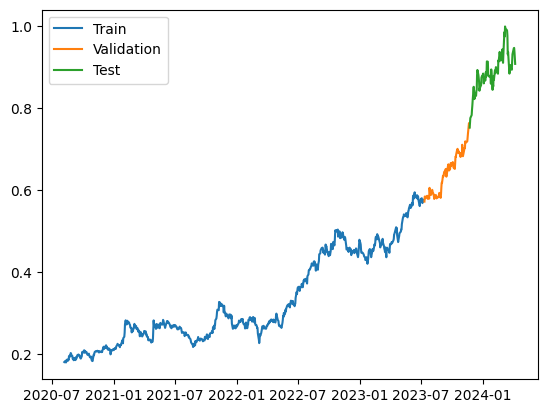

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LeakyReLU

model = Sequential([layers.Input((3,2)),
                    layers.LSTM(192),
                    Dropout(0.2),
                    layers.Dense(128),
                    LeakyReLU(alpha=0.1),
                    Dropout(0.4),
                    layers.Dense(32),
                    LeakyReLU(alpha=0.2),
                    Dropout(0.1),
                    layers.Dense(16),
                    LeakyReLU(alpha=0.2),
                    layers.Dense(4, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
# model.compile(loss='mse',
#               metrics=['mean_absolute_error'])

# Define a callback to save the model with the lowest validation MAE
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_mean_absolute_error', mode='min', save_best_only=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[model_checkpoint])

Epoch 1/100
23/23 [==============================] - 4s 39ms/step - loss: 0.0418 - mean_absolute_error: 0.1616 - val_loss: 0.0374 - val_mean_absolute_error: 0.1909
Epoch 2/100
11/23 [=============>................] - ETA: 0s - loss: 0.0067 - mean_absolute_error: 0.0610

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 0s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0625 - val_loss: 0.0142 - val_mean_absolute_error: 0.1167
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0471 - val_loss: 0.0055 - val_mean_absolute_error: 0.0729
Epoch 4/100
23/23 [==============================] - 0s 20ms/step - loss: 0.0022 - mean_absolute_error: 0.0354 - val_loss: 5.9197e-04 - val_mean_absolute_error: 0.0215
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0018 - mean_absolute_error: 0.0311 - val_loss: 0.0020 - val_mean_absolute_error: 0.0435
Epoch 6/100
23/23 [==============================] - 1s 22ms/step - loss: 0.0016 - mean_absolute_error: 0.0292 - val_loss: 0.0030 - val_mean_absolute_error: 0.0541
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0015 - mean_absolute_error: 0.0278 - val_loss: 2.0343e-04 - val_mean_absolute_error: 0.0119
Epoch 8/100
23/23 [=

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 192)               149760    
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               24704     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32)               

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_model.h5')

23/23 [==============================] - 1s 7ms/step


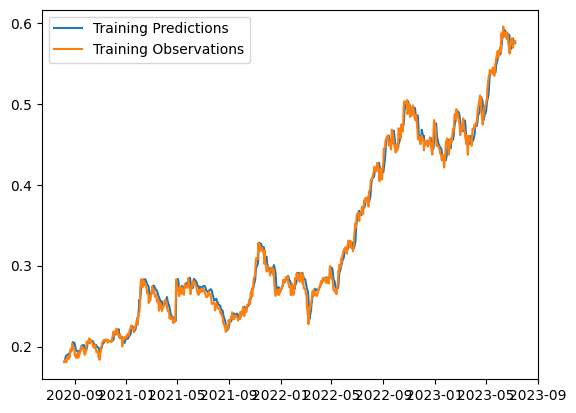

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 9ms/step


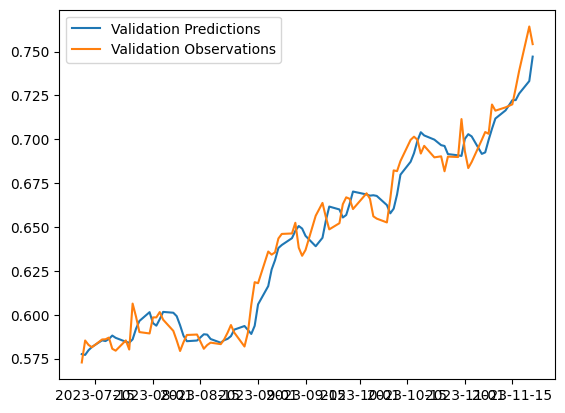

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 6ms/step


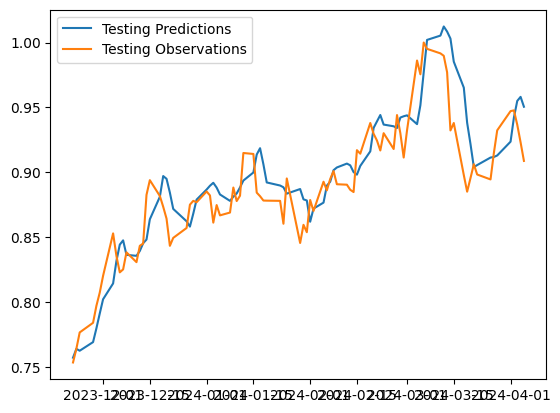

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

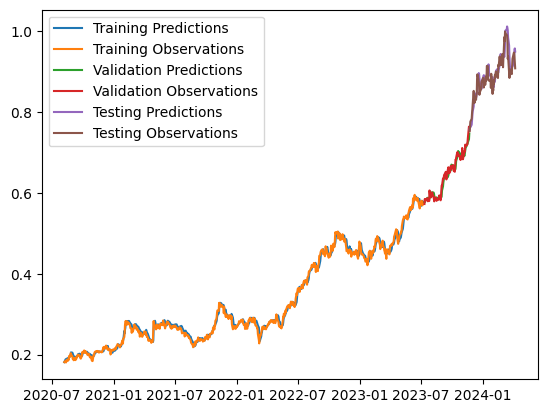

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE) for test data
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate Mean Absolute Error (MAE) for test data
test_mae = mean_absolute_error(y_test, test_predictions)

# Calculate R-squared (R2) for test data
test_r2 = r2_score(y_test, test_predictions)

# Calculate Mean Squared Error (MSE) for validation data
val_mse = mean_squared_error(y_val, val_predictions)

# Calculate Mean Absolute Error (MAE) for validation data
val_mae = mean_absolute_error(y_val, val_predictions)

# Calculate R-squared (R2) for validation data
val_r2 = r2_score(y_val, val_predictions)

# Print the results
print("Test Data:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("R-squared (R2):", test_r2)

print("\nValidation Data:")
print("Mean Squared Error (MSE):", val_mse)
print("Mean Absolute Error (MAE):", val_mae)
print("R-squared (R2):", val_r2)


Test Data:
Mean Squared Error (MSE): 0.000546156
Mean Absolute Error (MAE): 0.018420814
R-squared (R2): 0.7739157673725389

Validation Data:
Mean Squared Error (MSE): 0.00010761277
Mean Absolute Error (MAE): 0.008261412
R-squared (R2): 0.958386602032352


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model.h5')

# Function to preprocess input data
def preprocess_input(open_prices, volume_sizes):
    # Normalize the input data if necessary (use the same scaling as during training)
    # You may need to scale the data to match the range used during training
    # For example, if the model was trained with MinMax scaling, apply the same scaling here

    # Reshape the input data to match the model's input shape
    X = np.array([[open_prices], [volume_sizes]])
    return X

# Function to predict the next day's value
def predict_next_day(model, X):
    # Reshape input data to match the expected shape (batch_size, timesteps, features)
    X = X.reshape(1, 3, 2)

    # Predict the next day's value
    prediction = model.predict(X)
    return prediction

# Collect inputs for the previous 3 days' open and volume size
open_prices = []
volume_sizes = []
for i in range(3):
    open_price = float(input(f"Enter open price for day {i+1}: "))
    volume_size = float(input(f"Enter volume size for day {i+1}: "))
    open_prices.append(open_price)
    volume_sizes.append(volume_size)

# Preprocess input data
X = preprocess_input(open_prices, volume_sizes)

# Predict the next day's value
prediction = predict_next_day(model, X)

# Display the predicted value
print(f"Predicted value for the next day: {prediction[0][0]}")


KeyboardInterrupt: Interrupted by user